The following code trains and tests models on the Cat Recognition dataset with a varying number of layers, and then plots graphs of Test Prediction Accuracy against Layer Count and Training Time against Layer Count.

'Progress: Complete'

Training Times Regression Line Gradient: 2.72


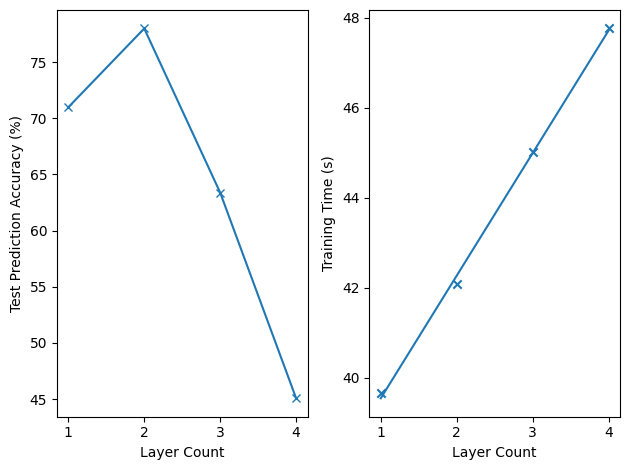

In [2]:
from IPython.display import clear_output, display
import os

import matplotlib.pyplot as plt
import numpy as np

from school_project.models.gpu.cat_recognition import CatRecognitionModel as Model

# Change to root directory of project
os.chdir(os.getcwd())

layer_counts = np.array(list(range(1, 5)))
neuron_count = 100
test_prediction_accuracies = np.array([])
training_times = np.array([])

for index, layer_count in enumerate(layer_counts):
    clear_output(wait=True)
    display(f"Progress: {round(number=index/len(layer_counts) * 100, ndigits=2)}%")

    model = Model(
           hidden_layers_shape=[neuron_count for layer in range(layer_count)],
           train_dataset_size=209,
           learning_rate=0.1,
           use_relu=True
           )
    model.create_model_values()
    model.train(epoch_count=3_500)
    model.test()

    test_prediction_accuracies = np.append(test_prediction_accuracies,
                                            model.test_prediction_accuracy)
    training_times = np.append(training_times,
                                model.training_time)

clear_output(wait=True)
display("Progress: Complete")

figure, axis = plt.subplots(nrows=1, ncols=2)

axis[0].set_xlabel("Layer Count")
axis[0].set_ylabel("Test Prediction Accuracy (%)")

axis[0].plot(layer_counts, test_prediction_accuracies, marker='x')

# Determine gradient and y-intercept of training times regression line
m, c = np.polyfit(layer_counts, training_times, deg=1)
print(f"Training Times Regression Line Gradient: {round(number=m, ndigits=2)}")

axis[1].set_xlabel("Layer Count")
axis[1].set_ylabel("Training Time (s)")

# Plot scatter graph of layer Counts and training times
axis[1].scatter(layer_counts, training_times, marker='x')

# Plot regression line
axis[1].plot(layer_counts, m * layer_counts + c)

plt.tight_layout()
plt.show()